# The packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
from kneed import KneeLocator

In [6]:
import pickle

# Read Data

In [7]:
#Read our decision Matrix
data = pd.read_csv("Data/Matrix.csv")
data.head(10)

,Node,DC,BC,CC,EC
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07
5,5,0.003219,2.205964e-06,0.261308,1.183322e-06
6,6,0.001486,2.453776e-08,0.261190,2.170904e-07
7,7,0.004953,1.702985e-04,0.274769,2.568510e-05
8,8,0.001981,2.760498e-07,0.261224,2.197375e-07
9,9,0.014116,1.645424e-05,0.262055,2.214117e-06


In [8]:
X = data[["DC","BC","CC","EC"]]
#pca = PCA(2)
X

,DC,BC,CC,EC
0,0.085934,1.463059e-01,0.353343,3.391796e-05
1,0.004210,2.783274e-06,0.261376,6.045346e-07
2,0.002476,7.595021e-08,0.261258,2.233461e-07
3,0.004210,1.685066e-06,0.261376,6.635648e-07
4,0.002476,1.840332e-07,0.261258,2.236416e-07
...,...,...,...,...
4034,0.000495,0.000000e+00,0.183989,2.951270e-10
4035,0.000248,0.000000e+00,0.183980,2.912901e-10
4036,0.000495,0.000000e+00,0.183989,2.931223e-10
4037,0.000991,7.156847e-08,0.184005,2.989233e-10


In [9]:
#read the 10 influential nodes
influential = pd.read_csv("Data/res.csv")
inf10 = influential.head(6)
inf10

,Node,DC,BC,CC,EC,S+,S-,C
0,107,0.258791,0.480518,0.459699,2.606940e-04,0.019029,0.200396,0.913277
1,1684,0.196137,0.337797,0.393606,7.164260e-06,0.061948,0.141539,0.695566
2,1912,0.186974,0.229295,0.350947,9.540696e-02,0.102563,0.100961,0.496063
3,3437,0.135463,0.236115,0.314413,9.531613e-08,0.103349,0.098846,0.488865
4,0,0.085934,0.146306,0.353343,3.391796e-05,0.140349,0.061395,0.304321
5,1085,0.016345,0.149015,0.357852,3.164082e-06,0.142845,0.060458,0.297379


In [10]:
#convert it to numpy array
Y = inf10[["DC","BC","CC","EC"]]
Yrr = Y.to_numpy()
Yrr

array([[2.58791481e-01, 4.80518079e-01, 4.59699454e-01, 2.60693991e-04],
       [1.96136701e-01, 3.37797450e-01, 3.93605615e-01, 7.16425979e-06],
       [1.86973749e-01, 2.29295340e-01, 3.50947332e-01, 9.54069615e-02],
       [1.35463101e-01, 2.36115357e-01, 3.14412520e-01, 9.53161293e-08],
       [8.59336305e-02, 1.46305921e-01, 3.53342667e-01, 3.39179617e-05],
       [1.63447251e-02, 1.49015092e-01, 3.57851826e-01, 3.16408207e-06]])

# Elbow Method

In [62]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, n_init=1000)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

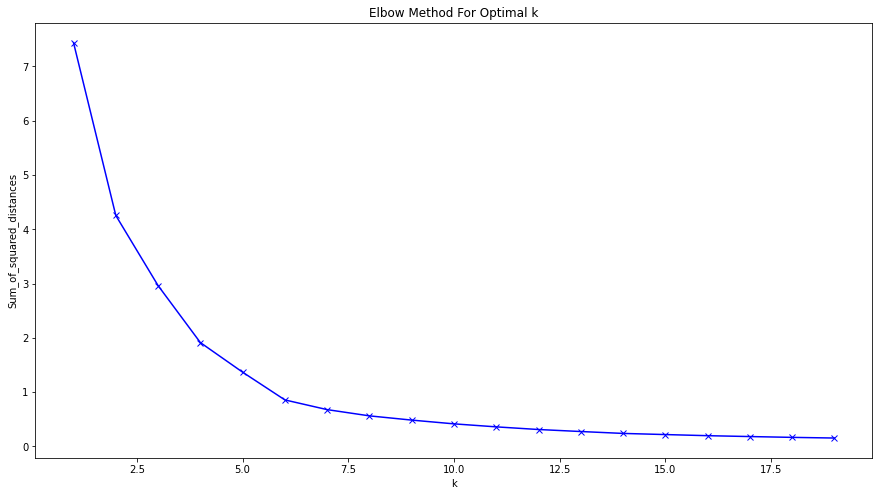

In [63]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [64]:
#K Optimal
kn = KneeLocator(K, Sum_of_squared_distances, curve='convex', direction='decreasing')
print(kn.knee)

6


# KMeans Application using K generated by Elbow Method

In [30]:
kmeans = KMeans(n_clusters=kn.knee, max_iter=20000, n_init=1, random_state=0)

In [31]:
#Communities
label=kmeans.fit_predict(X)
for i in (label):
    print(i)

2
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
5
5
5
5
2
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
2
5
5
5
5
5
0
5
5
0
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
3
5
5
5
5
5
5
5
5
5
5
5
0
0
5
0
5
5
0
5
5
5
5
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
5
0
5
5
5
0
5
5
5
5
5
0
5
5
5
5
5
5
0
5
5
0
5
5
0
5
2
5
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
0
5
5
5
0
5
5
5
5
5
5
5
5
5
5
0
5
5
5
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
0
5
5
5
5
5
5
0
5
5
5
5
5
5
0
5
0
5
5
5
5
5
5
5
5
5
5
5
5
5
5
0
5
5
5
5
5
5
5
5
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [32]:
#convert to DataFrame
lab = pd.DataFrame(label, columns=['center'])
lab

,center
0,2
1,5
2,5
3,5
4,5
...,...
4034,1
4035,1
4036,1
4037,1


In [33]:
#Community of each Node
community = pd.concat([data, lab], axis=1)
community.head(20)

,Node,DC,BC,CC,EC,center
0,0,0.085934,1.463059e-01,0.353343,3.391796e-05,2
1,1,0.004210,2.783274e-06,0.261376,6.045346e-07,5
2,2,0.002476,7.595021e-08,0.261258,2.233461e-07,5
3,3,0.004210,1.685066e-06,0.261376,6.635648e-07,5
4,4,0.002476,1.840332e-07,0.261258,2.236416e-07,5
5,5,0.003219,2.205964e-06,0.261308,1.183322e-06,5
6,6,0.001486,2.453776e-08,0.261190,2.170904e-07,5
7,7,0.004953,1.702985e-04,0.274769,2.568510e-05,0
8,8,0.001981,2.760498e-07,0.261224,2.197375e-07,5
9,9,0.014116,1.645424e-05,0.262055,2.214117e-06,5


In [34]:
gk = community.groupby('center')
gk.first()

,Node,DC,BC,CC,EC
center,,,,,
0,7,0.004953,0.000170,0.274769,2.568510e-05
1,686,0.042100,0.029722,0.216910,9.353314e-12
2,0,0.085934,0.146306,0.353343,3.391796e-05
3,107,0.258791,0.480518,0.459699,2.606940e-04
4,2543,0.072808,0.007605,0.291300,7.287131e-02
5,1,0.004210,0.000003,0.261376,6.045346e-07


In [35]:
#Regrouper les communitées dans une  list comm
#à l'intérieur de chaque liste on trouve les noeuds appartient à une communauté 
comm = []
for i in range(kn.knee):
    comm.append(gk.get_group(i)['Node'].tolist())

# Community Graph

In [36]:
Graph = nx.read_edgelist('Data/facebookData.txt',create_using=nx.Graph(),nodetype=int)

print(nx.info(Graph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [37]:
with open('Data/networkShape.pkl', 'rb') as f:
    pos = pickle.load(f)

In [38]:
size=[]
for i in range(6):
    sslist=[]
    for j in comm[i]:
        list1=[107,1684,1912,3437,0,1085,698,567,58,428]
        if j in list1:
            sslist.append(3150)
        else:
            sslist.append(70)
    size.append(sslist)

In [39]:
keyList = inf10.Node.tolist()
myDict = {key: key for key in keyList}

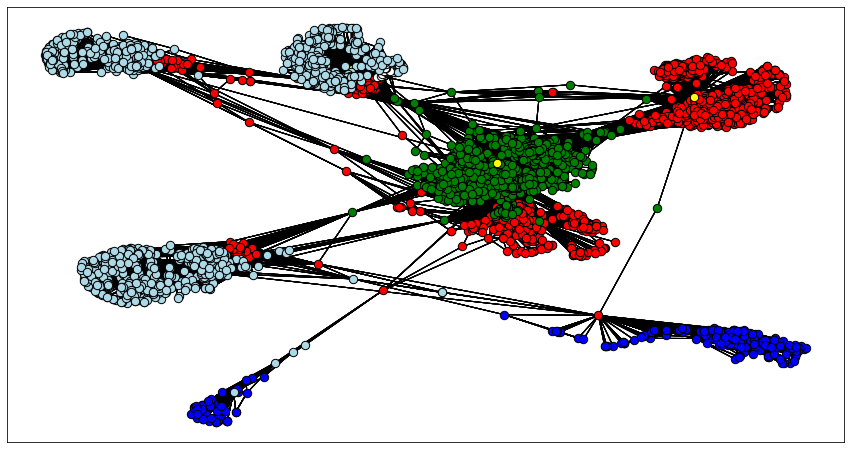

In [45]:
plt.rcParams.update({'figure.figsize': (15, 8)})
colors=['red','blue','green','yellow','white','lightblue','brown','grey','purple','pink','orange','gold','olive']
for i in range(kn.knee):
    nx.draw_networkx(Graph, pos=pos, nodelist=comm[i], node_color= colors[i],with_labels=False,node_size=70, font_size=8,
        edgecolors='black')

# Plot the Community

<function matplotlib.pyplot.show(close=None, block=None)>

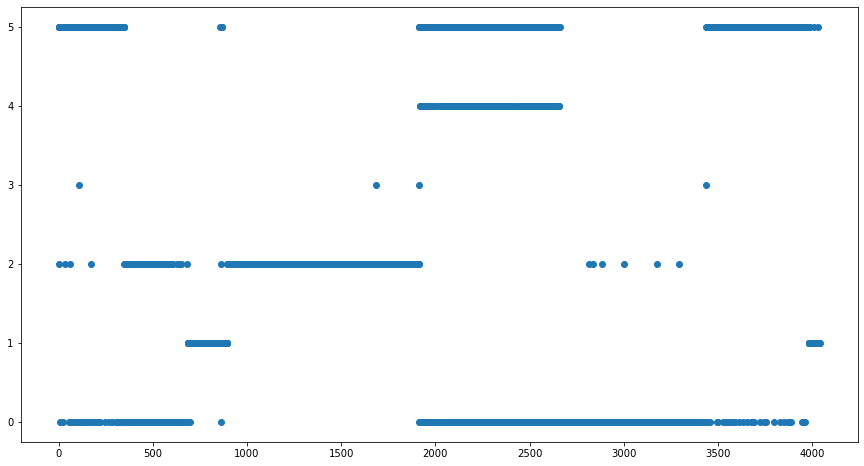

In [46]:
plt.scatter(community['Node'], community['center'])
plt.show

# Silhouette Method

In [ ]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
    km = KMeans(n_clusters=k+2, n_init=1000)
    km.fit(X)
    res[k] = metrics.silhouette_score(X,km.labels_)
print(res)

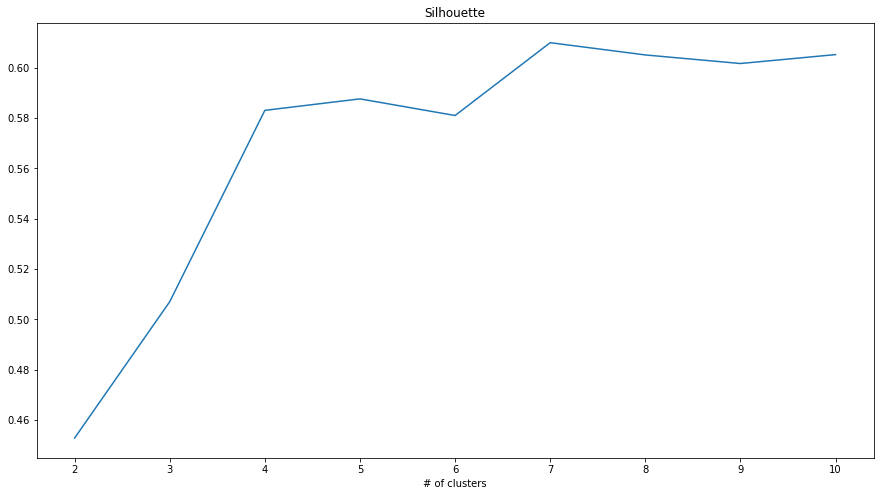

In [61]:
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()